In [1]:
import numpy as np
import math
class lr(object):
    
    def load_csv(self, path, delimiter):
        # load data
        print("loading data...\n")
        data = np.loadtxt(path, dtype=np.str, delimiter=delimiter)
        
        # set feature from str to float64
        feature = np.array(data[:, :-1].astype(np.float64))
        
        label = np.array(data[:, -1]).astype(np.float64)
        return feature, label
    
    def leastSquares(self, X, y, order): 
            # using the fact that \theta = (X^T X)^(-1)X^T y
            # set X_0 = 1
            orderX = []
            for i in X:
                tmp = []
                for j in i:
                    for k in range(1, order+1):
                        tmp.append(math.pow(j, k))
                orderX.append(tmp)
            orderX = np.array(orderX)
            one = np.ones(X.shape[0])
            orderX = np.c_[one, orderX]
            theta = np.ones(orderX.shape[1])
            parameter = np.dot(np.dot(np.matrix(np.dot(orderX.T, orderX)).I, orderX.T), y)
            return parameter
           
        
    def run(self):
        feature, label = self.load_csv("project1.csv", ",")
#         print(feature, label)
        parameter = self.leastSquares(feature, label, 4)
        
lr = lr()
lr.run()

loading data...



In [3]:
from matplotlib import pyplot as plt  
import numpy as np  
from mpl_toolkits.mplot3d import Axes3D
  
fig = plt.figure()  
ax = Axes3D(fig)  
X = np.arange(-2, 2, 0.1)  
Y = np.arange(-2, 2, 0.1)  
X, Y = np.meshgrid(X, Y)  
Z = X**2 + Y**2  

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='rainbow')  
plt.show() 

ModuleNotFoundError: No module named 'matplotlib'

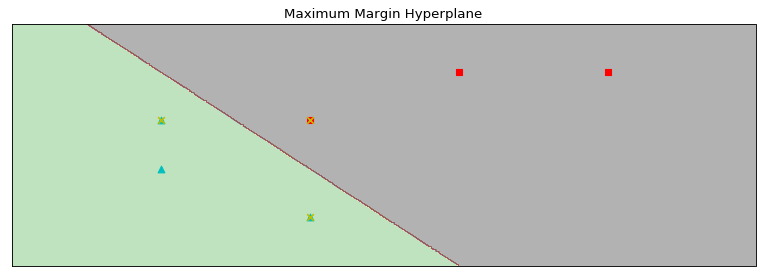

In [4]:
from sklearn import svm
import numpy as np
import matplotlib.pyplot as plt

def plot_hyperplane(clf, X, y, 
                    h=0.01, 
                    draw_sv=True, 
                    title='hyperplane'):
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    plt.title(title)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) # hyperplane
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='Accent', alpha=0.5)

    markers = ['o', 's', '^']
    colors = ['b', 'r', 'c']
    labels = np.unique(y)
    for label in labels:
        plt.scatter(X[y==label][:, 0], 
                    X[y==label][:, 1], 
                    c=colors[label], 
                    marker=markers[label])
    # draw support vector
    if draw_sv:
        sv = clf.support_vectors_
        plt.scatter(sv[:, 0], sv[:, 1], c='y', marker='x')

        
X = np.array([[1, 2],[2, 3],[2, 1],[3, 4],[1, 3],[4, 4]])
y = [-1, 1, -1, 1, -1, 1]
clf = svm.SVC(C=10, kernel='linear')
clf.fit(X, y)

plt.figure(figsize=(12, 4), dpi=80)

plot_hyperplane(clf, X, y, h=0.01, 
                title='Maximum Margin Hyperplane')


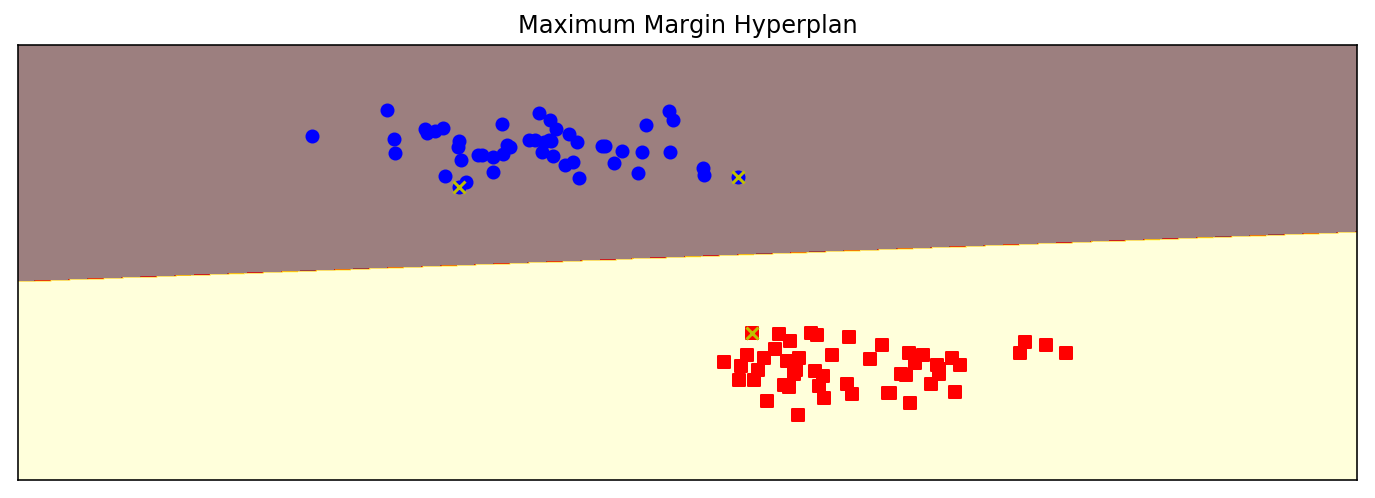

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def plot_hyperplane(clf, X, y, 
                    h=0.02, 
                    draw_sv=True, 
                    title='hyperplan'):
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    plt.title(title)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='hot', alpha=0.5)

    markers = ['o', 's', '^']
    colors = ['b', 'r', 'c']
    labels = np.unique(y)
    for label in labels:
        plt.scatter(X[y==label][:, 0], 
                    X[y==label][:, 1], 
                    c=colors[label], 
                    marker=markers[label])
    if draw_sv:
        sv = clf.support_vectors_
        plt.scatter(sv[:, 0], sv[:, 1], c='y', marker='x')

        
from sklearn import svm
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=2, 
                  random_state=0, cluster_std=0.3)
clf = svm.SVC(C=1.0, kernel='linear')
clf.fit(X, y)

plt.figure(figsize=(12, 4), dpi=144)
plot_hyperplane(clf, X, y, h=0.01, 
                title='Maximum Margin Hyperplan')
